**Histogram Equalization**

Original Histogram


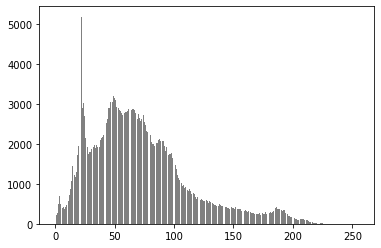

Plot of cumulative distribution


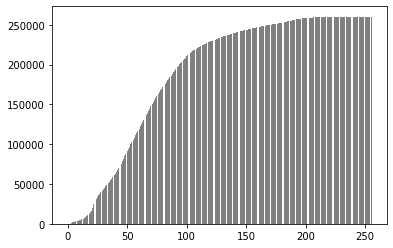

Histogram of new pixel values


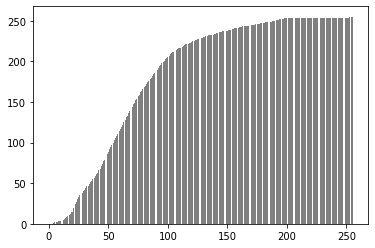

New Histogram


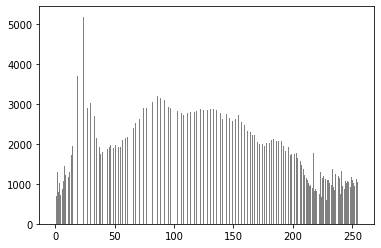

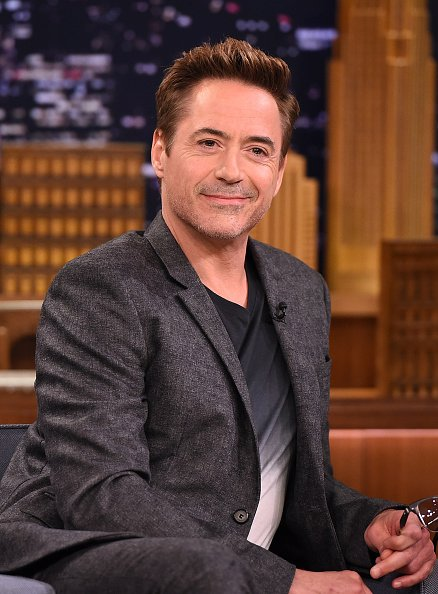

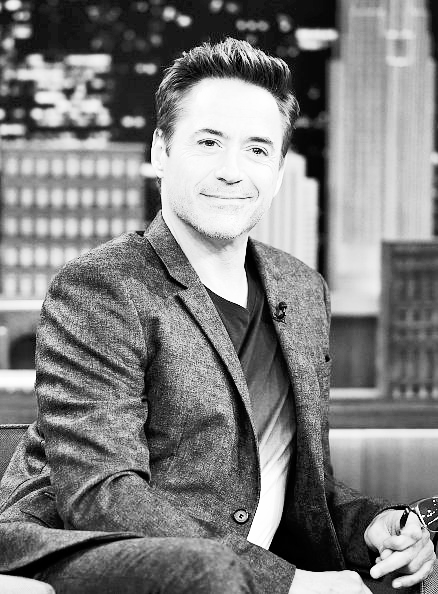

True

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the input image
original_img = cv2.imread("rdj.jpg")

# Convert the input image into grayscale
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

img_size = gray_img.shape
height = img_size[0]
width = img_size[1]

# Display the original histogram
store = np.zeros((256,),dtype=np.int32)
saved = np.zeros((256,),dtype=np.int32)
for i in range(height):
    for j in range(width):
       k = gray_img[i,j]
       store[k] += 1
# print('Store Value')
# print(store)
print('Original Histogram')
x = np.arange(0,256)
plt.bar(x,store,color="gray",align="center")
plt.show()

# Perform the cumulative distribution function
sum_hist = np.cumsum(store)
# print('Sum Histogram 255')
# print(sum_hist[255])
# print('Sum Histogram')
# print(sum_hist)
# Show the plot of cumulative distribution
print('Plot of cumulative distribution')
x = np.arange(0,256)
plt.bar(x,sum_hist,color="gray",align="center")
plt.show()

# Get the new pixel value from the cumulative distribution
for x in range(0,256):
    saved[x] = sum_hist[x] * 255 / sum_hist[255]
# Show the histogram of new pixel value
print('Histogram of new pixel values')
x = np.arange(0,256)
plt.bar(x,saved,color="gray",align="center")
plt.show()

# Write new pixel value into the old image
for i in range(height):
    for j in range(width):
        k = gray_img[i,j]
        gray_img[i, j] = saved[k]
# Display the new image histogram
store = np.zeros((256,),dtype=np.int32)
saved = np.zeros((256,),dtype=np.int32)
for i in range(height):
    for j in range(width):
       k = gray_img[i,j]
       store[k] += 1
# print('Stored Value')
# print(store)
print('New Histogram')
x = np.arange(0,256)
plt.bar(x,store,color="gray",align="center")
plt.show()

# Show and save the result
cv2_imshow(original_img)
cv2_imshow(gray_img)
cv2.imwrite("result.jpg", gray_img)